In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
files = [file for file in os.listdir('ERF_vs_n_smallb/') if 'results' in file]

In [3]:
with open('ERF_vs_n_smallb/paramgrid_vsn.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [4]:
param_grid

[{'a1': 7.69, 'm': 10000},
 {'a1': 7.69, 'm': 20000},
 {'a1': 7.76, 'm': 10000},
 {'a1': 7.76, 'm': 20000},
 {'a1': 7.92, 'm': 10000},
 {'a1': 7.92, 'm': 20000},
 {'a1': 8.07, 'm': 10000},
 {'a1': 8.07, 'm': 20000},
 {'a1': 8.76, 'm': 10000},
 {'a1': 8.76, 'm': 20000}]

In [5]:
results_m10000 = {}
results_m20000 = {}

for file in range(len(files)):
    with open('ERF_vs_n_smallb/'+files[file], 'rb') as f:
        result = pickle.load(f)
    result_index = int(files[file].split('_')[-1].split('.')[0])
    
    if param_grid[result_index]['m'] == 10000:
        results_m10000[param_grid[result_index]['a1']] = {}
        results_m10000[param_grid[result_index]['a1']]['ERF_peak'] = result['ERF_peak']
        results_m10000[param_grid[result_index]['a1']]['ERF_exposure'] = result['ERF_exposure']
        
    elif param_grid[result_index]['m'] == 20000:
        results_m20000[param_grid[result_index]['a1']] = {}
        results_m20000[param_grid[result_index]['a1']]['ERF_peak'] = result['ERF_peak']
        results_m20000[param_grid[result_index]['a1']]['ERF_exposure'] = result['ERF_exposure']

In [8]:
a1values = np.array([7.69,7.76,7.92,8.07,8.76])
nrange_m10000 = np.linspace(1,29900-10000,50)
nrange_m20000 = np.linspace(1,29900-20000,50)

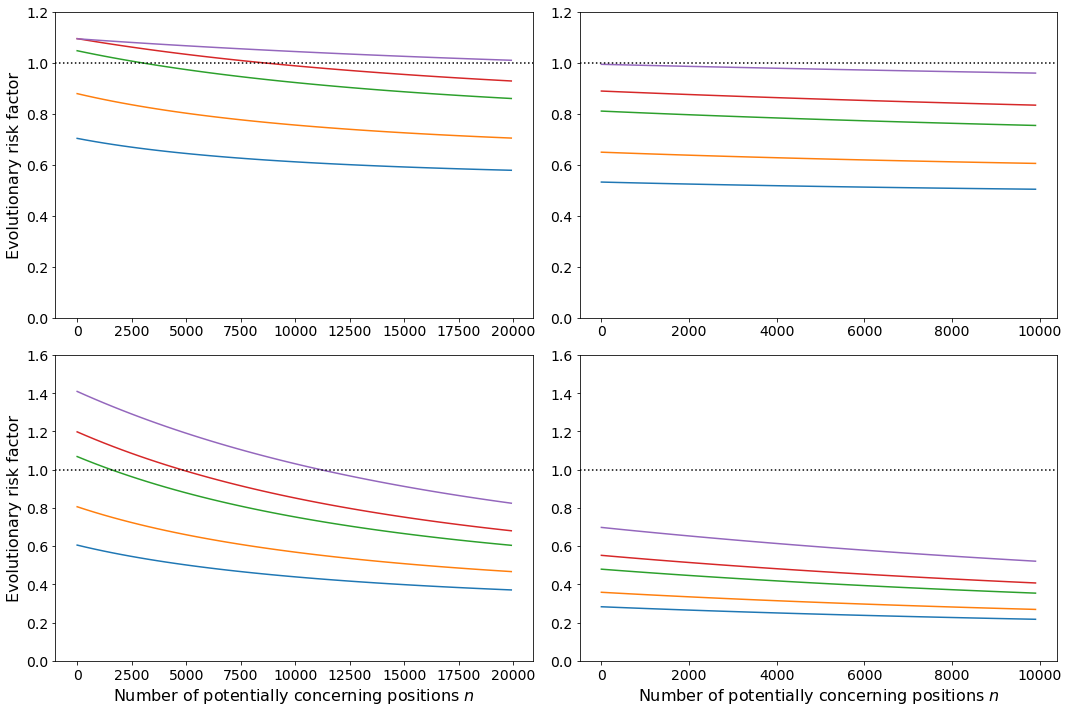

In [9]:
fig, ax = plt.subplots(2,2,figsize = (15,10))

for a1val in a1values:
    ax[0,0].plot(nrange_m10000, results_m10000[a1val]['ERF_peak'])
    ax[0,1].plot(nrange_m20000, results_m20000[a1val]['ERF_peak'])
    ax[1,0].plot(nrange_m10000, results_m10000[a1val]['ERF_exposure'])
    ax[1,1].plot(nrange_m20000, results_m20000[a1val]['ERF_exposure'])

    
for i in range(2):
    ax[0,i].set_ylim(0,1.2)
    ax[1,i].set_ylim(0,1.6)
    ax[1,i].set_xlabel('Number of potentially concerning positions $n$', fontsize = 16)
    ax[i,0].set_ylabel('Evolutionary risk factor', fontsize = 16)
    for j in range(2):
        ax[i,j].axhline(1, c='k', linestyle = 'dotted')
        ax[i,j].tick_params(labelsize = 14)
        

plt.tight_layout()
#plt.savefig('ERF_vs_numberconcerningmutn_smallb.jpg', dpi = 600, bbox_inches = 'tight')

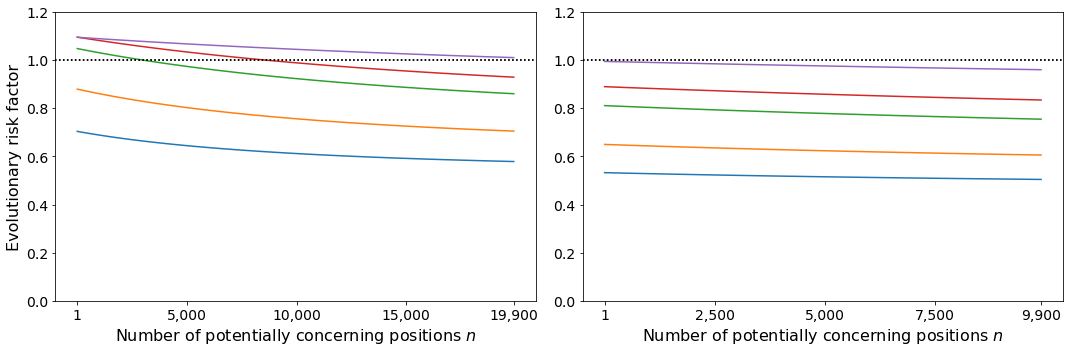

In [10]:
fig, ax = plt.subplots(1,2,figsize = (15,5))

for a1val in a1values:
    ax[0].plot(nrange_m10000, results_m10000[a1val]['ERF_peak'])
    ax[1].plot(nrange_m20000, results_m20000[a1val]['ERF_peak'])

for i in range(2):
    ax[i].set_ylim(0,1.2)
    ax[i].set_xlabel('Number of potentially concerning positions $n$', fontsize = 16)
    ax[0].set_ylabel('Evolutionary risk factor', fontsize = 16)
    for j in range(2):
        ax[j].axhline(1, c='k', linestyle = 'dotted')
        ax[j].tick_params(labelsize = 14)
        
    ax[0].set_xticks([1,5000,10000,15000,19900])
    ax[1].set_xticks([1,2500,5000,7500,9900])
    
    ax[0].set_xticklabels(['1','5,000','10,000','15,000','19,900'])
    ax[1].set_xticklabels(['1','2,500','5,000','7,500','9,900'])

plt.tight_layout()
plt.savefig('ERF_vs_numberconcerningmutn_smallb_splitpeak.jpg', dpi = 600, bbox_inches = 'tight')

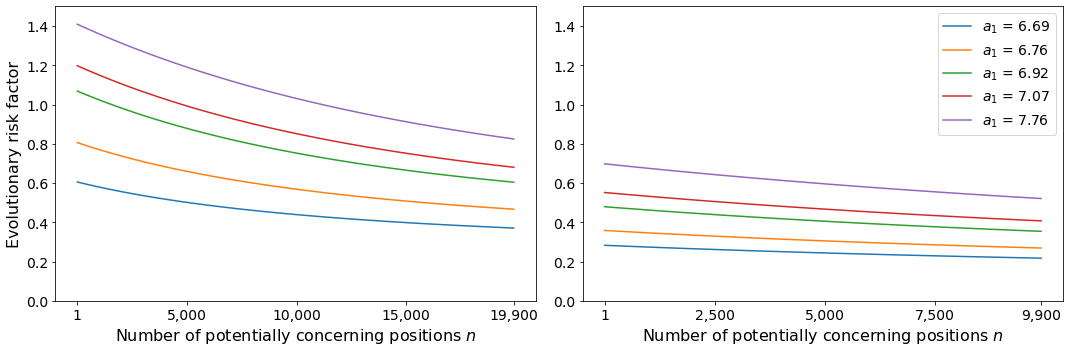

In [17]:
fig, ax = plt.subplots(1,2,figsize = (15,5))

for a1val in a1values:
    ax[0].plot(nrange_m10000, results_m10000[a1val]['ERF_exposure'])
    ax[1].plot(nrange_m20000, results_m20000[a1val]['ERF_exposure'])

for i in range(2):
    ax[i].set_ylim(0,1.5)
    ax[i].set_xlabel('Number of potentially concerning positions $n$', fontsize = 16)
    ax[0].set_ylabel('Evolutionary risk factor', fontsize = 16)
    for j in range(2):
        #ax[j].axhline(1, c='k', linestyle = 'dotted')
        ax[j].tick_params(labelsize = 14)
        
    ax[0].set_xticks([1,5000,10000,15000,19900])
    ax[1].set_xticks([1,2500,5000,7500,9900])
    
    ax[0].set_xticklabels(['1','5,000','10,000','15,000','19,900'])
    ax[1].set_xticklabels(['1','2,500','5,000','7,500','9,900'])

ax[1].legend(['$a_1$ = '+str(a1val) for a1val in np.array([6.69,6.76,6.92,7.07,7.76])], fontsize = 14)
plt.tight_layout()
plt.savefig('ERF_vs_numberconcerningmutn_smallb_splitexposure_legend.jpg', dpi = 600, bbox_inches = 'tight')